## Karatsuba Multiplication

<img src="img/karatsuba_mult_description.png" alt="Drawing" style="width: 400px;" align="left"/>

In [2]:
def dig_mult(a: str, b: str) -> str:
    return str(int(a) * int(b))

def str_sum(a: str, b: str) -> str:
    return str(int(a) + int(b))

def add_zeros(a: str, n: int) -> str:
    return a + '0' * n

In [3]:
from typing import Union

def karatsuba_mult_str(x: str, y: str) -> int:
    if len(x) == 1 or len(y) == 1:
        return dig_mult(x, y)
    mid = len(str(x)) // 2
    a, b, c, d = x[:-mid], x[-mid:], y[:-mid], y[-mid:]
    ac = karatsuba_mult_str(a, c)
    bd = karatsuba_mult_str(b, d)
    aPb_cPd = karatsuba_mult_str(str_sum(a, b), str_sum(c, d))
    a_dPb_c = str(int(aPb_cPd) - int(ac) - int(bd))
    final_res = str(int(ac + '0' * (2 * mid)) + int(a_dPb_c + '0' * (mid)) + int(bd))
    return final_res

def karatsuba_mult_int(x: int, y: int) -> int:
    x, y = str(x), str(y)
    return int(karatsuba_mult_str(x, y))

### tests

In [4]:
from helpers_functions import test_function

test_cases = [
    ((12, 34), 12 * 34),
    ((1, 2), 2),
    ((1234, 9873), 1234 * 9873),
    ((46, 171), 46 * 171),
    ((0, 1234), 0),
    ((124258972654, 32894879236587123), 124258972654 * 32894879236587123)
]

test_function(karatsuba_mult_int, test_cases, True)

Test 0 passed
Test 1 passed
Test 2 passed
Test 3 passed
Test 4 passed
Test 5 passed


### compare inference with default python multiplication 

In [6]:
num1, num2 = 3141592653589793238462643383279502884197169399375105820974944592, 2718281828459045235360287471352662497757247093699959574966967627

In [17]:
%%timeit
karatsuba_mult_int(num1, num2)

2.09 ms ± 81.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [19]:
%%timeit
3141592653589793238462643383279502884197169399375105820974944592 * 2718281828459045235360287471352662497757247093699959574966967627

172 ns ± 1.56 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


very bad)

### test time complexity

According to the Master Method, we should get time complexity $O(n^{log_3^2})$, because we have next reccurent equation: $T(n)=3T(n/2)+O(n)$ and $3 > 2^1$

<img src="img/master_method.png" alt="Drawing" style="width: 400px;" align="left"/>

$\frac{C * (2n)^{log_2^3}}{C * n^{log_2^3}}=2^{log_2^3}=3 \Rightarrow$ if the algorithm is correct we will see mean time growth $\thickapprox 3$ when we will double number of digits

In [77]:
import random
time_test_cases = []
for i in range(11):
    a = random.randint(10 ** (2 ** i), 10 ** (2 ** i + 1) - 1)
    b = random.randint(10 ** (2 ** i), 10 ** (2 ** i + 1) - 1)
    time_test_cases.append((a, b))

In [78]:
loop = 10
time_results = []
for items in time_test_cases:
    result = timeit.timeit('karatsuba_mult_int(*items)', globals=globals(), number=loop)
    time_results.append(result / loop)

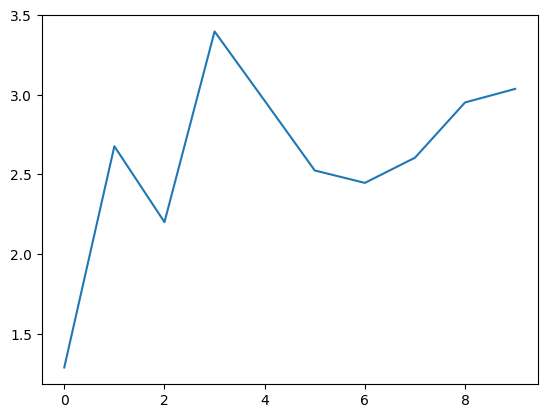

In [82]:
import numpy as np
plt.plot(np.array(time_results[1:] / np.array(time_results[:-1])))

seems like not so far from truth, but no so good